In [1]:
!nvidia-smi

Thu Feb 29 14:45:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [3]:
%cd /mydrive/Synapsis

/content/gdrive/My Drive/Synapsis


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

In [5]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='worker.jpeg' save=True

100% 6.23M/6.23M [00:00<00:00, 57.0MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/gdrive/MyDrive/Synapsis/worker.jpeg: 640x480 1 person, 308.1ms
Speed: 12.3ms preprocess, 308.1ms inference, 1320.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


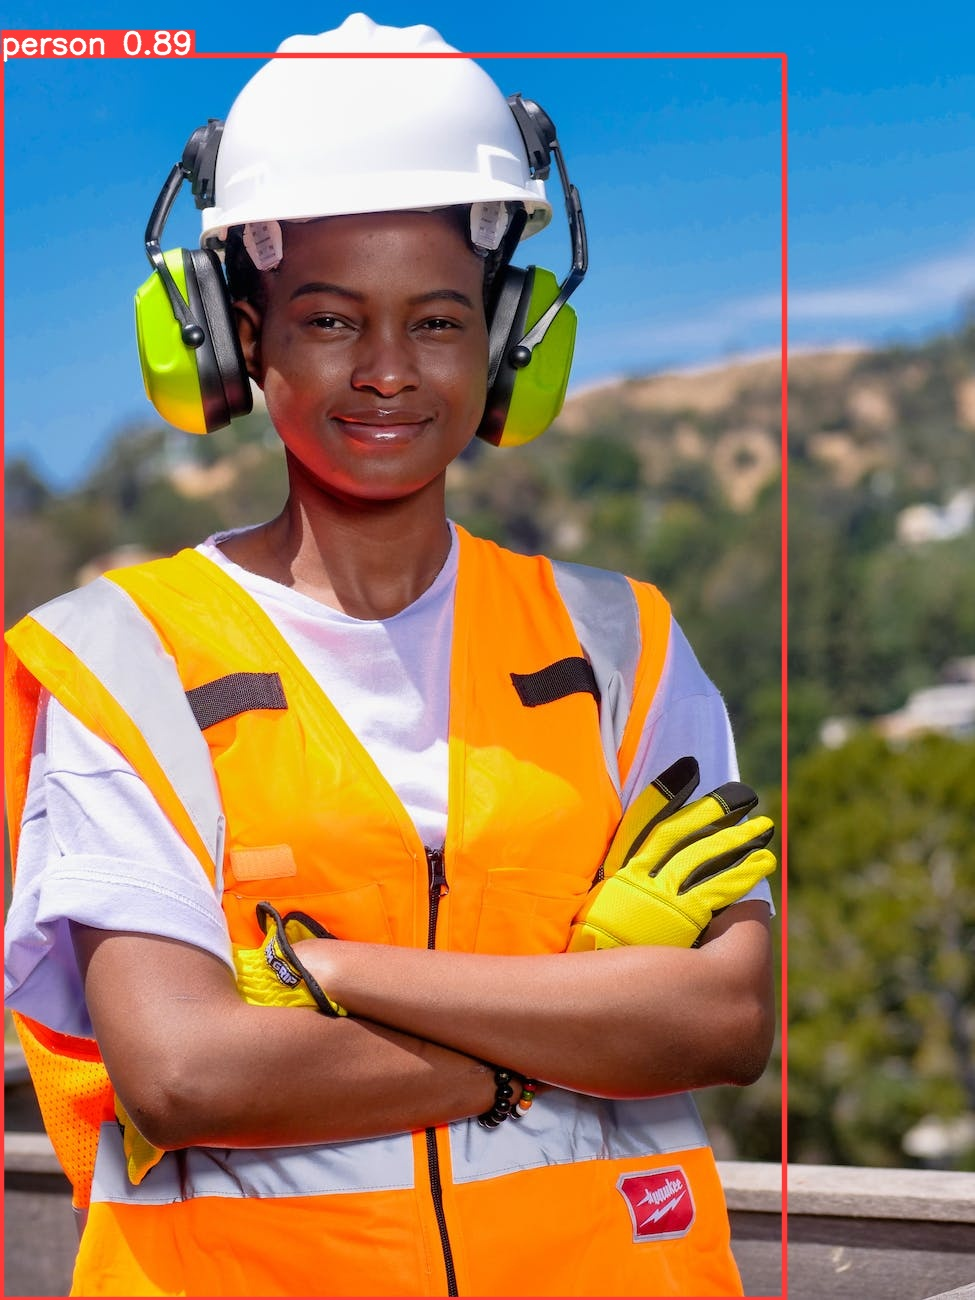

In [8]:
Image(filename='runs/detect/predict/worker.jpeg', height=600)

In [9]:
model = YOLO(f'yolov8n.pt')
results = model.predict(source='worker.jpeg', conf=0.25)


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/gdrive/MyDrive/Synapsis/worker.jpeg: 640x480 1 person, 96.0ms
Speed: 5.0ms preprocess, 96.0ms inference, 695.8ms postprocess per image at shape (1, 3, 640, 480)


In [10]:
results[0].boxes.xyxy

tensor([[   1.4183,   55.1479,  784.6730, 1299.0562]], device='cuda:0')

In [11]:
results[0].boxes.conf

tensor([0.8861], device='cuda:0')

In [12]:
results[0].boxes.cls

tensor([0.], device='cuda:0')

In [13]:
!mkdir datasets

# !pip install roboflow
!pip install roboflow --quiet

In [15]:
from roboflow import Roboflow
rf = Roboflow(api_key="sArcyDyZDlPBJJaAkUhD")
project = rf.workspace("ppe10").project("ppe10-exc-cctv")
dataset = project.version(1).download("yolov8")

# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="sArcyDyZDlPBJJaAkUhD")
# project = rf.workspace("ppe-yh4wn").project("personal-protective-equipment-dtt2i")
# dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ppe10-exc-cctv-1 in yolov8:: 100%|██████████| 8557/8557 [01:12<00:00, 117.72it/s]


In [16]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 137MB/s]
New https://pypi.org/project/ultralytics/8.1.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/gdrive/MyDrive/Synapsis/ppe10-exc-cctv-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, 

In [17]:
!ls runs/detect/train/

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1709218276.3868b6c17628.21826.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1880.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch1881.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch1882.jpg  weights
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg


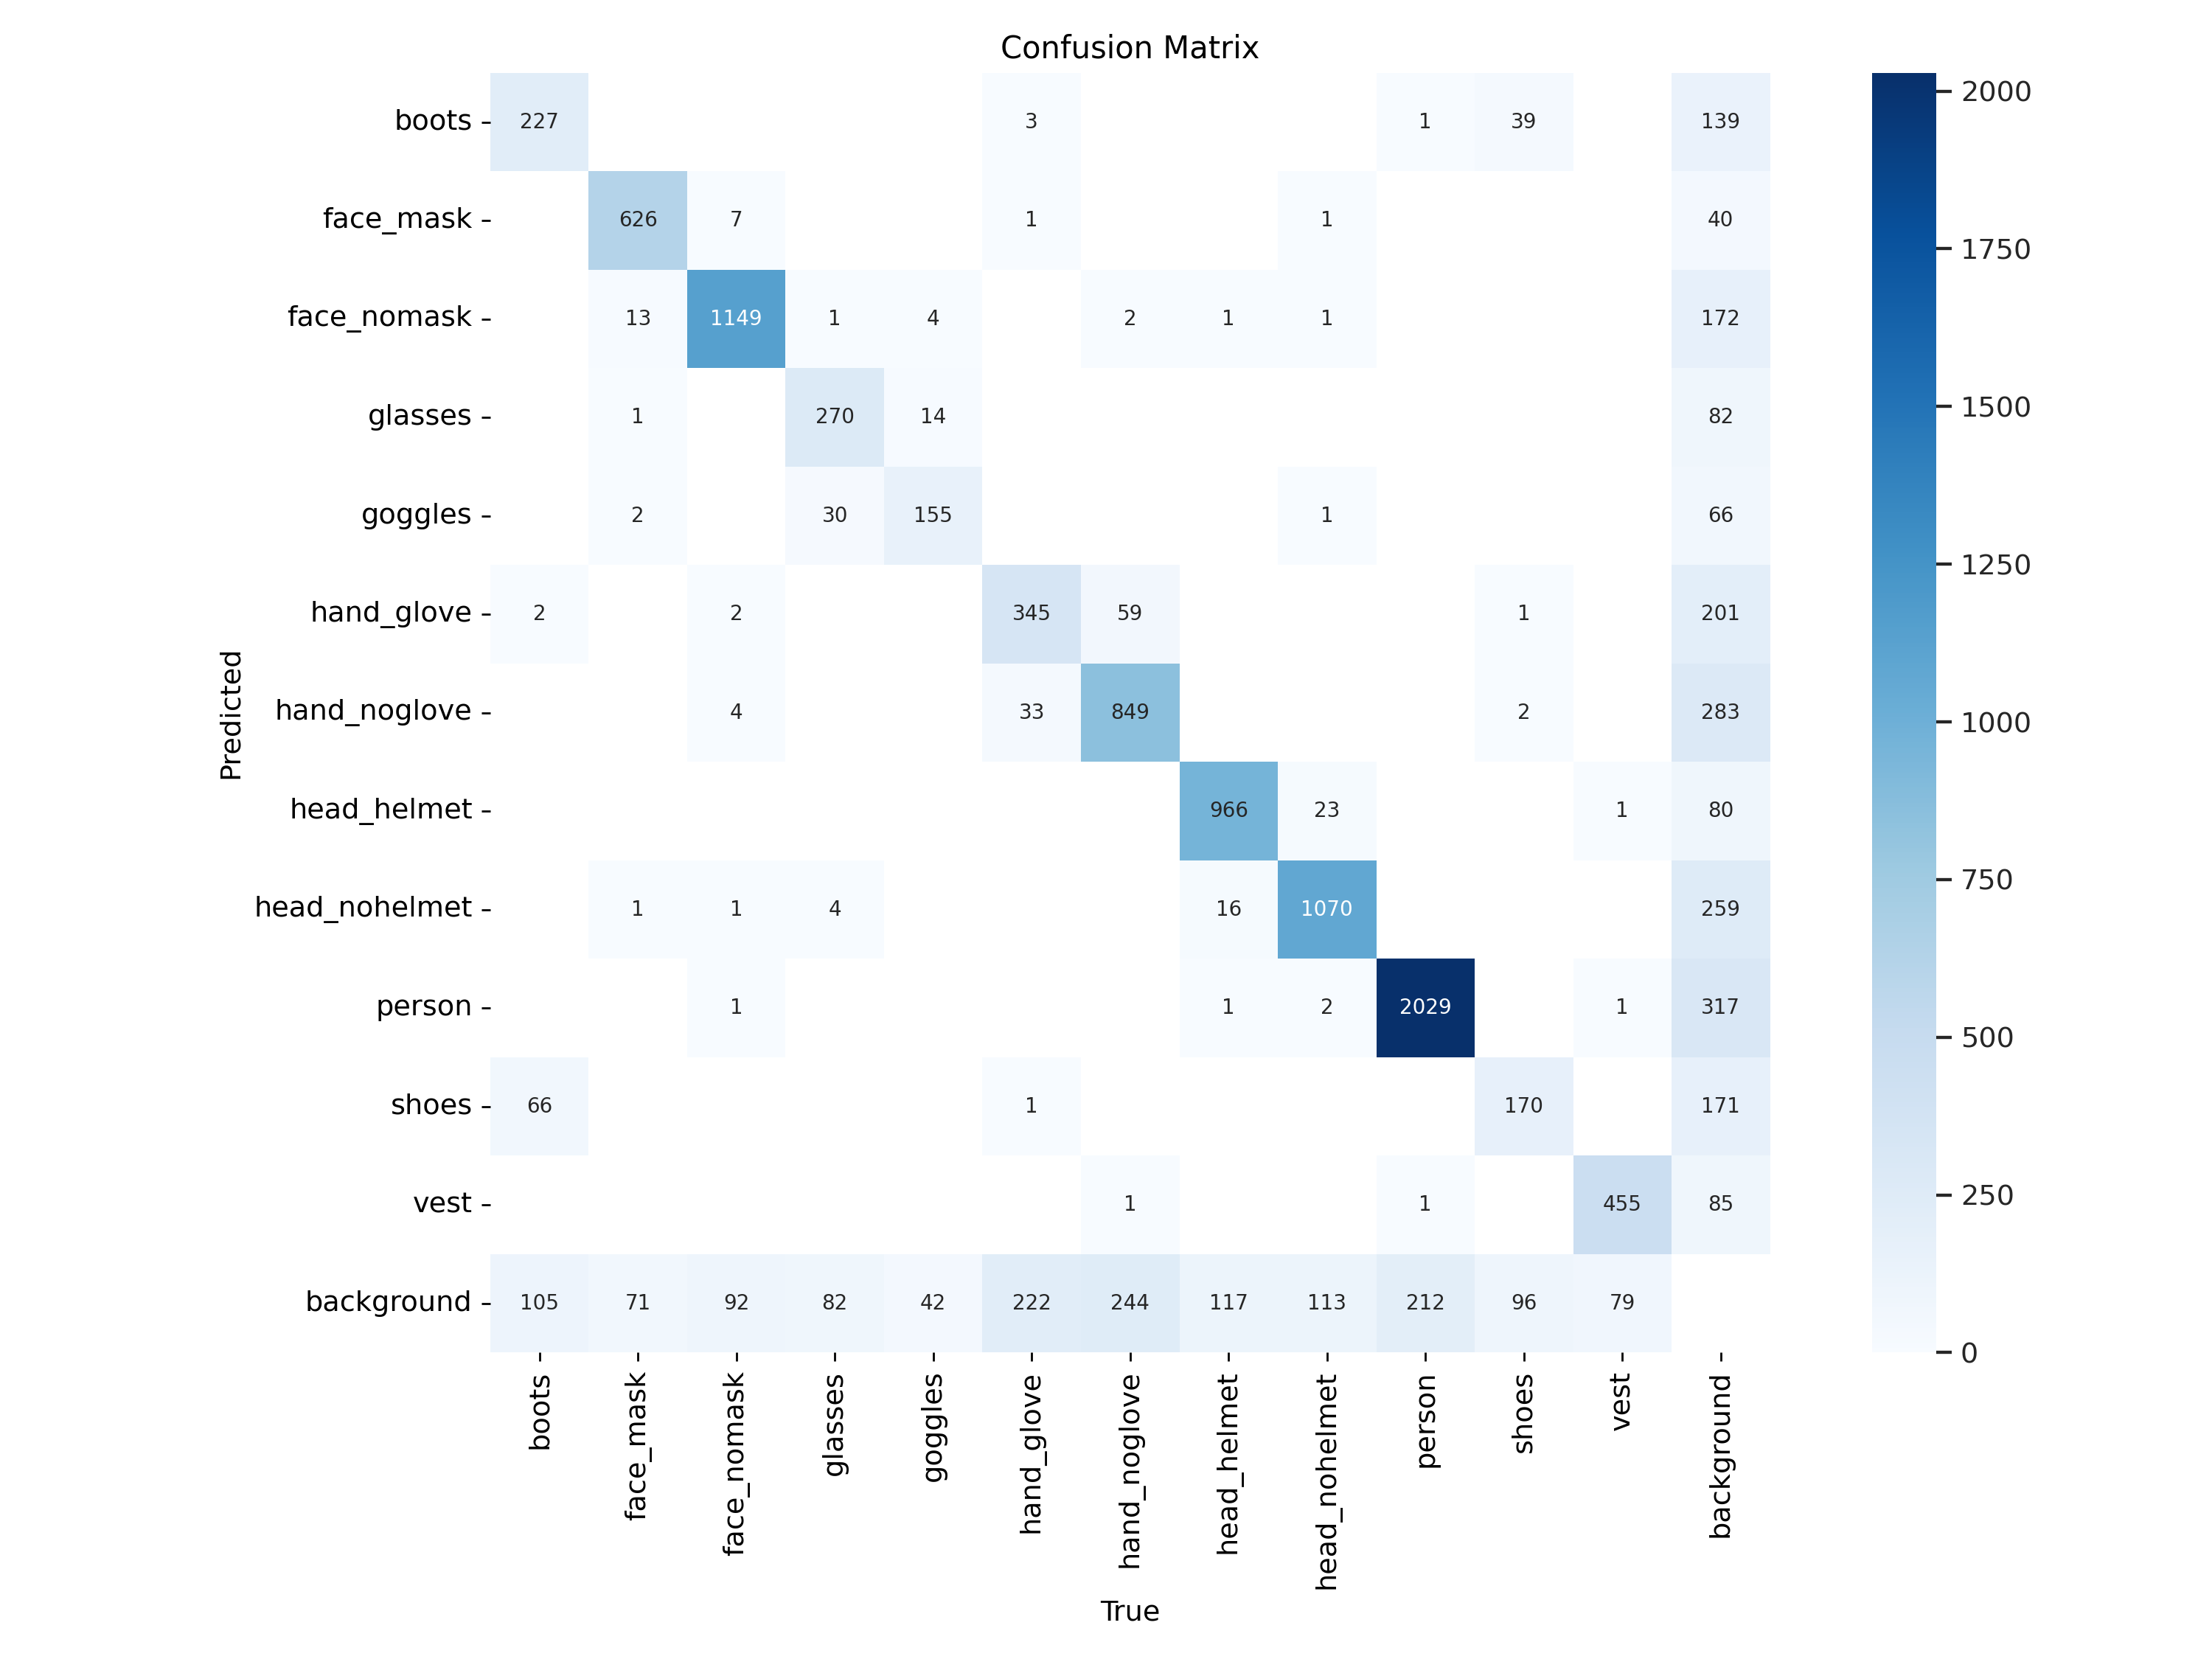

In [18]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=1000)

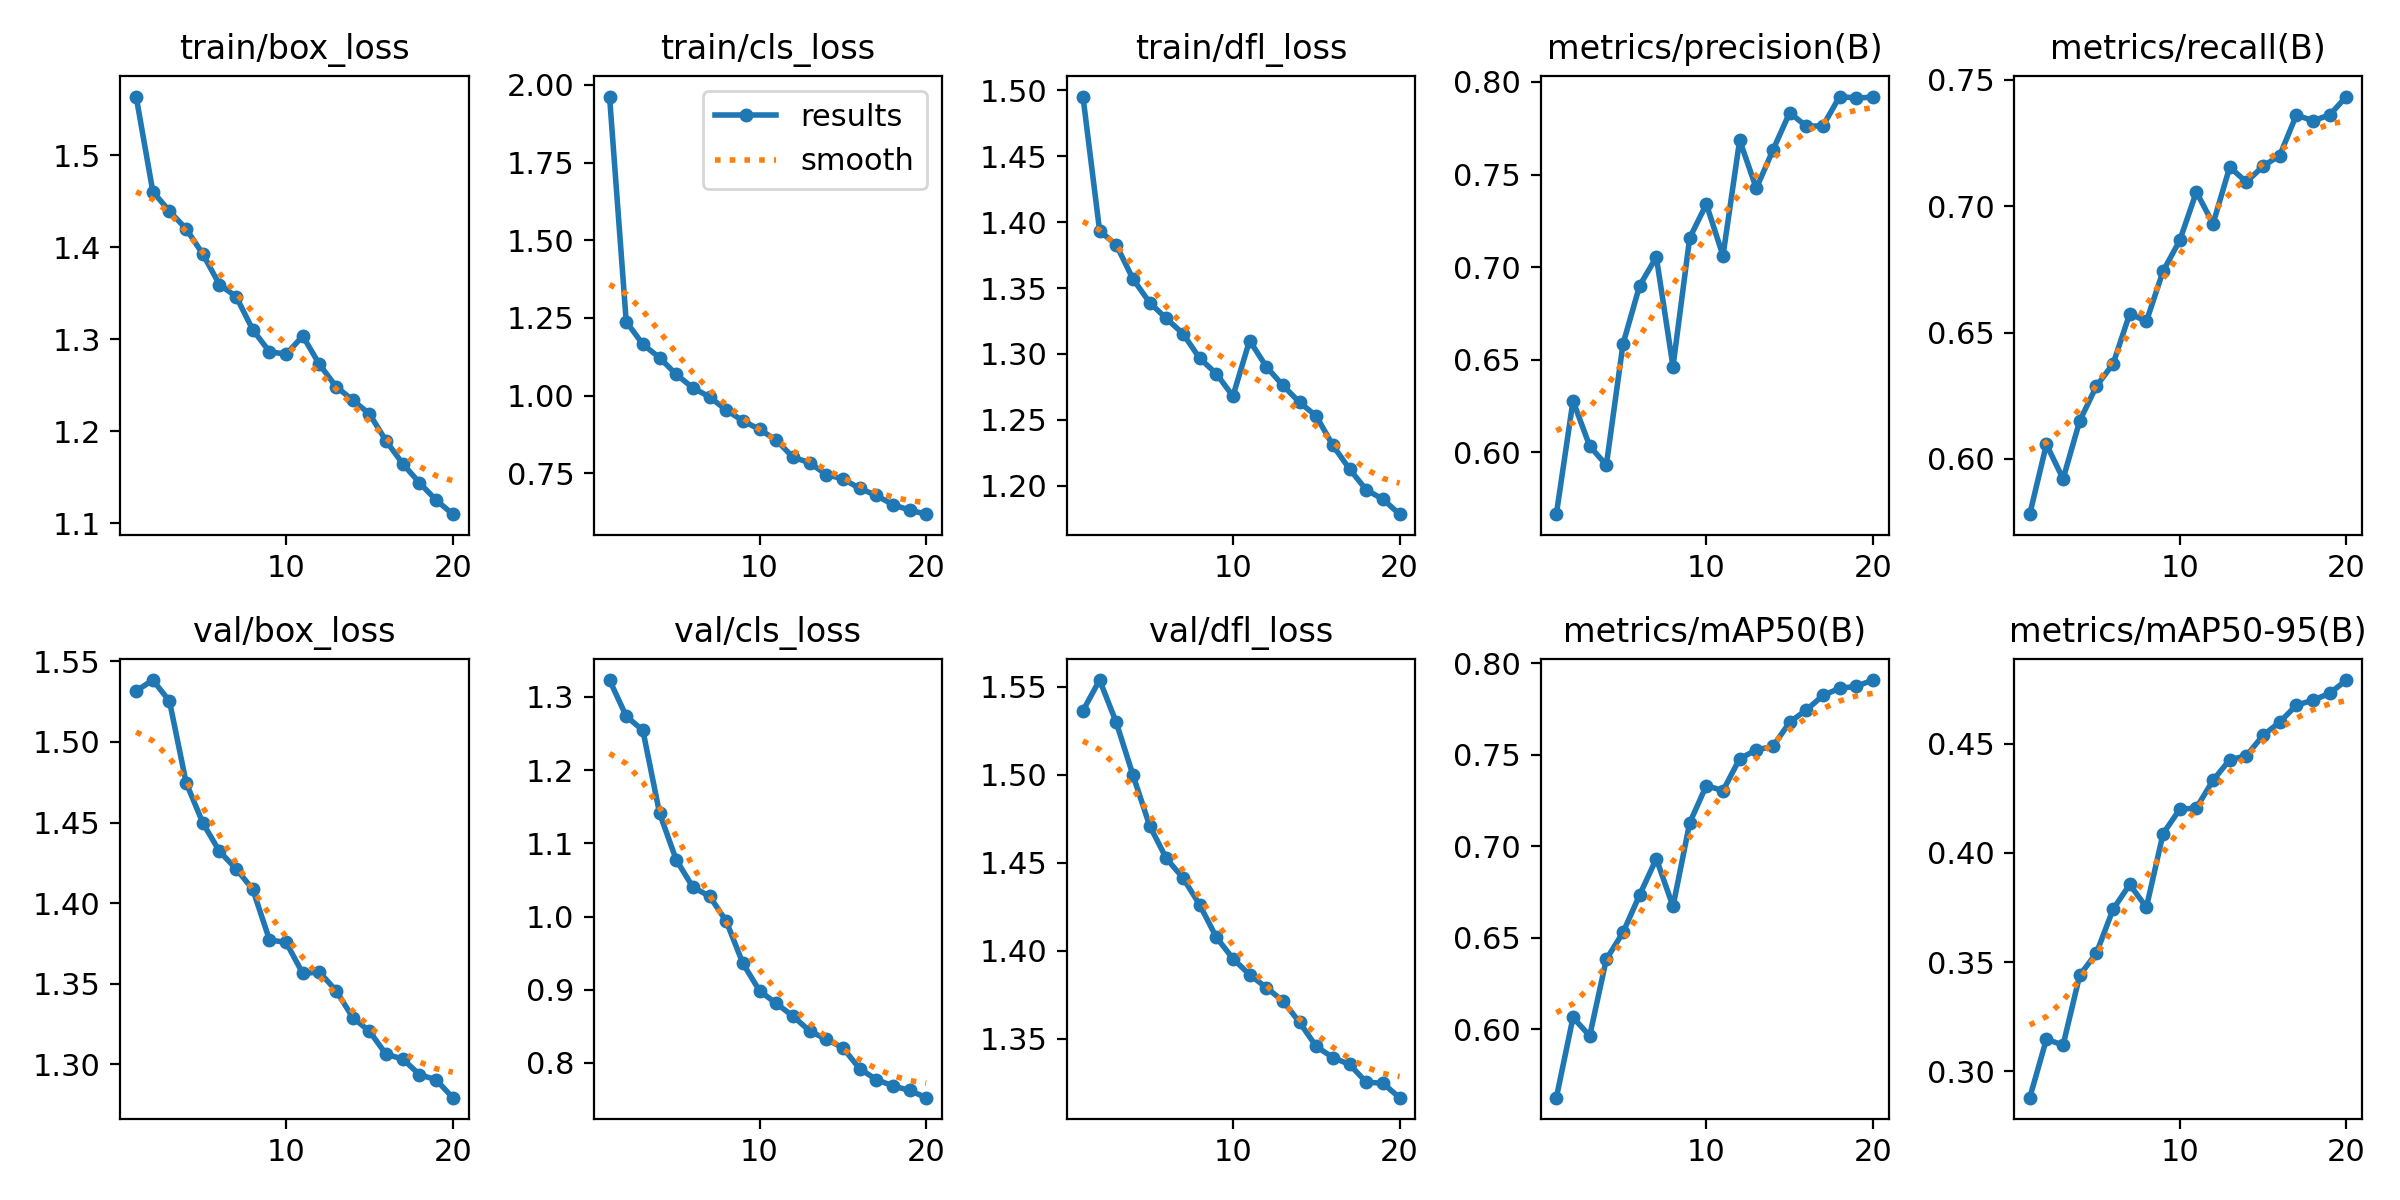

In [19]:
Image(filename=f'runs/detect/train/results.png', width=1000)

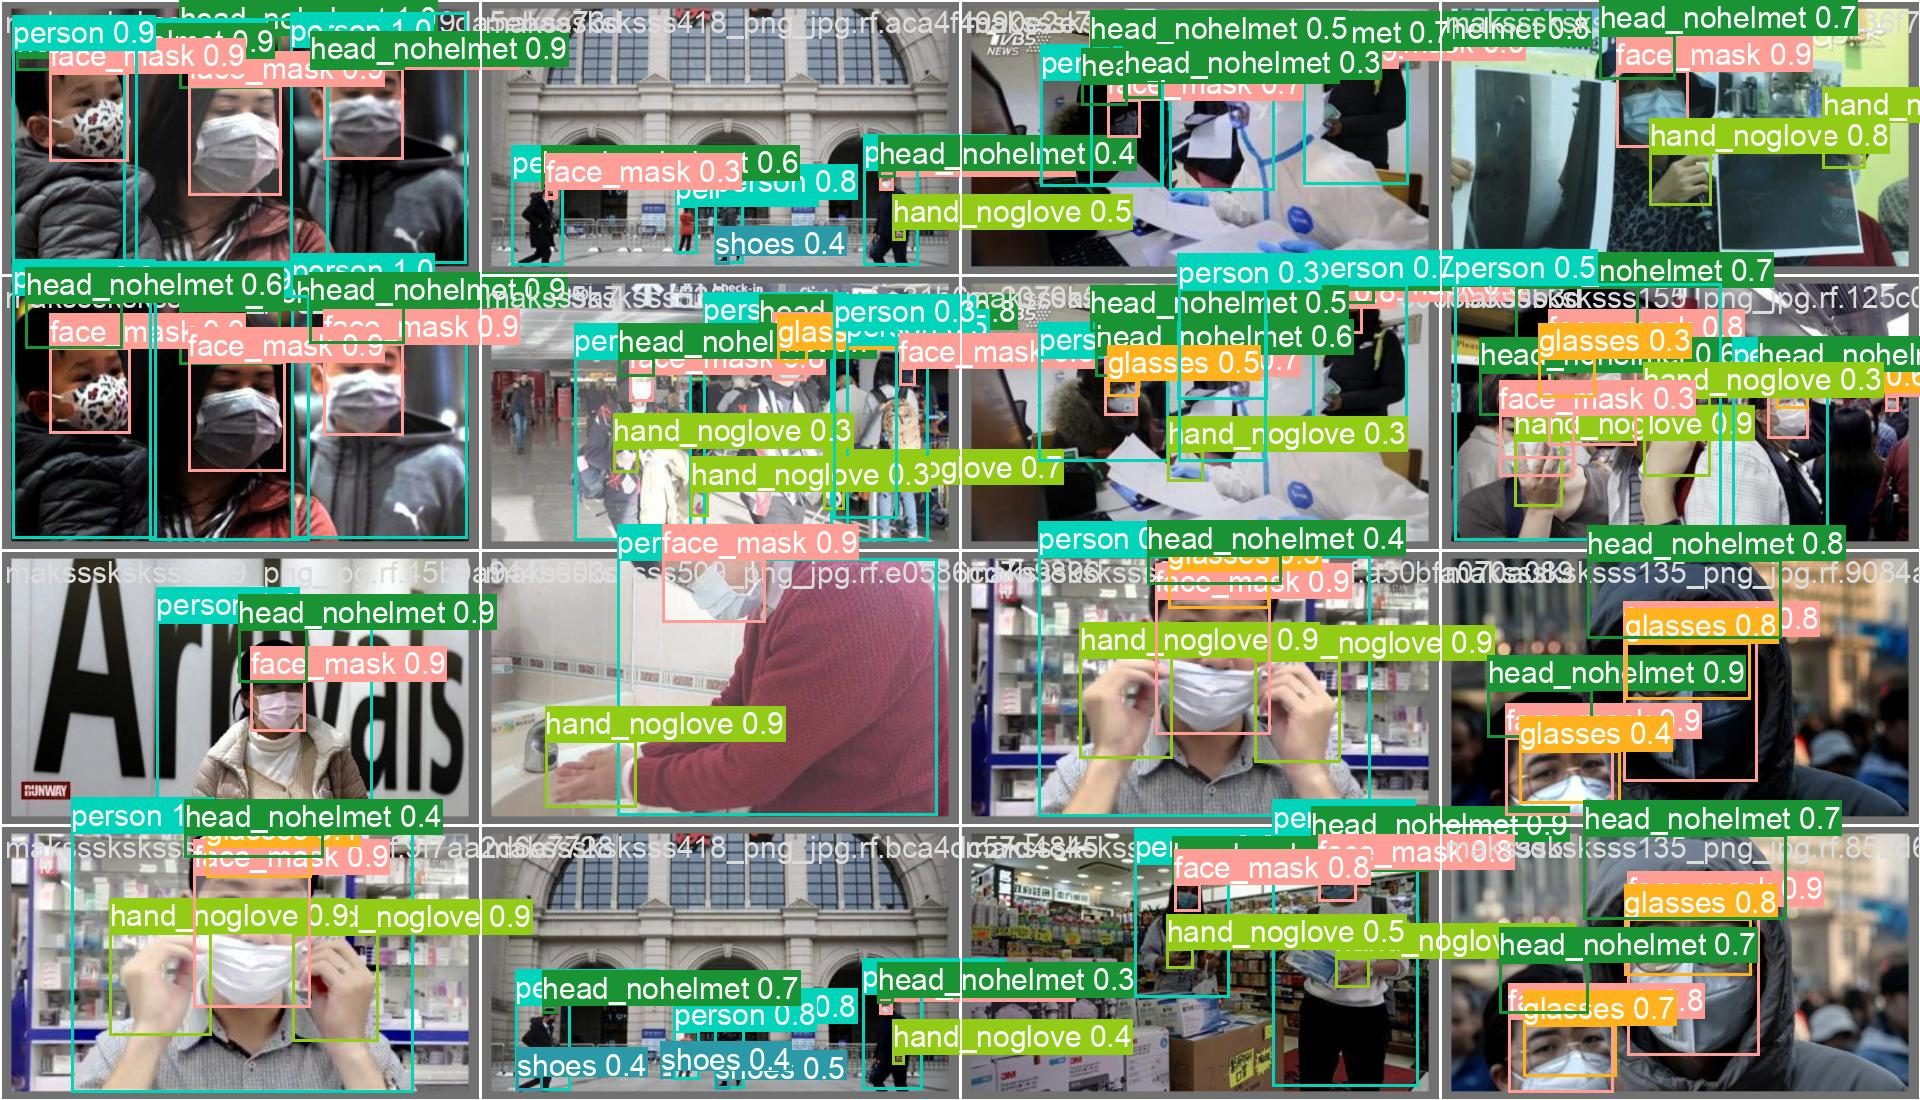

In [20]:
Image(filename=f'runs/detect/train/val_batch1_pred.jpg', width=1000)

In [21]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/gdrive/MyDrive/Synapsis/ppe10-exc-cctv-1/valid/labels.cache... 1273 images, 0 backgrounds, 0 corrupt: 100% 1273/1273 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 80/80 [00:41<00:00,  1.91it/s]
                   all       1273      10131      0.792      0.744      0.791      0.479
                 boots       1273        400      0.708      0.542      0.612      0.301
             face_mask       1273        714      0.955      0.901      0.955       0.76
           face_nomask       1273       1256      0.892      0.899      0.939      0.545
               glasses       1273        387       0.81      0.685      0.789      0.442
               goggles       1273        215      0.706      0.707      0.769      0.522
            ha

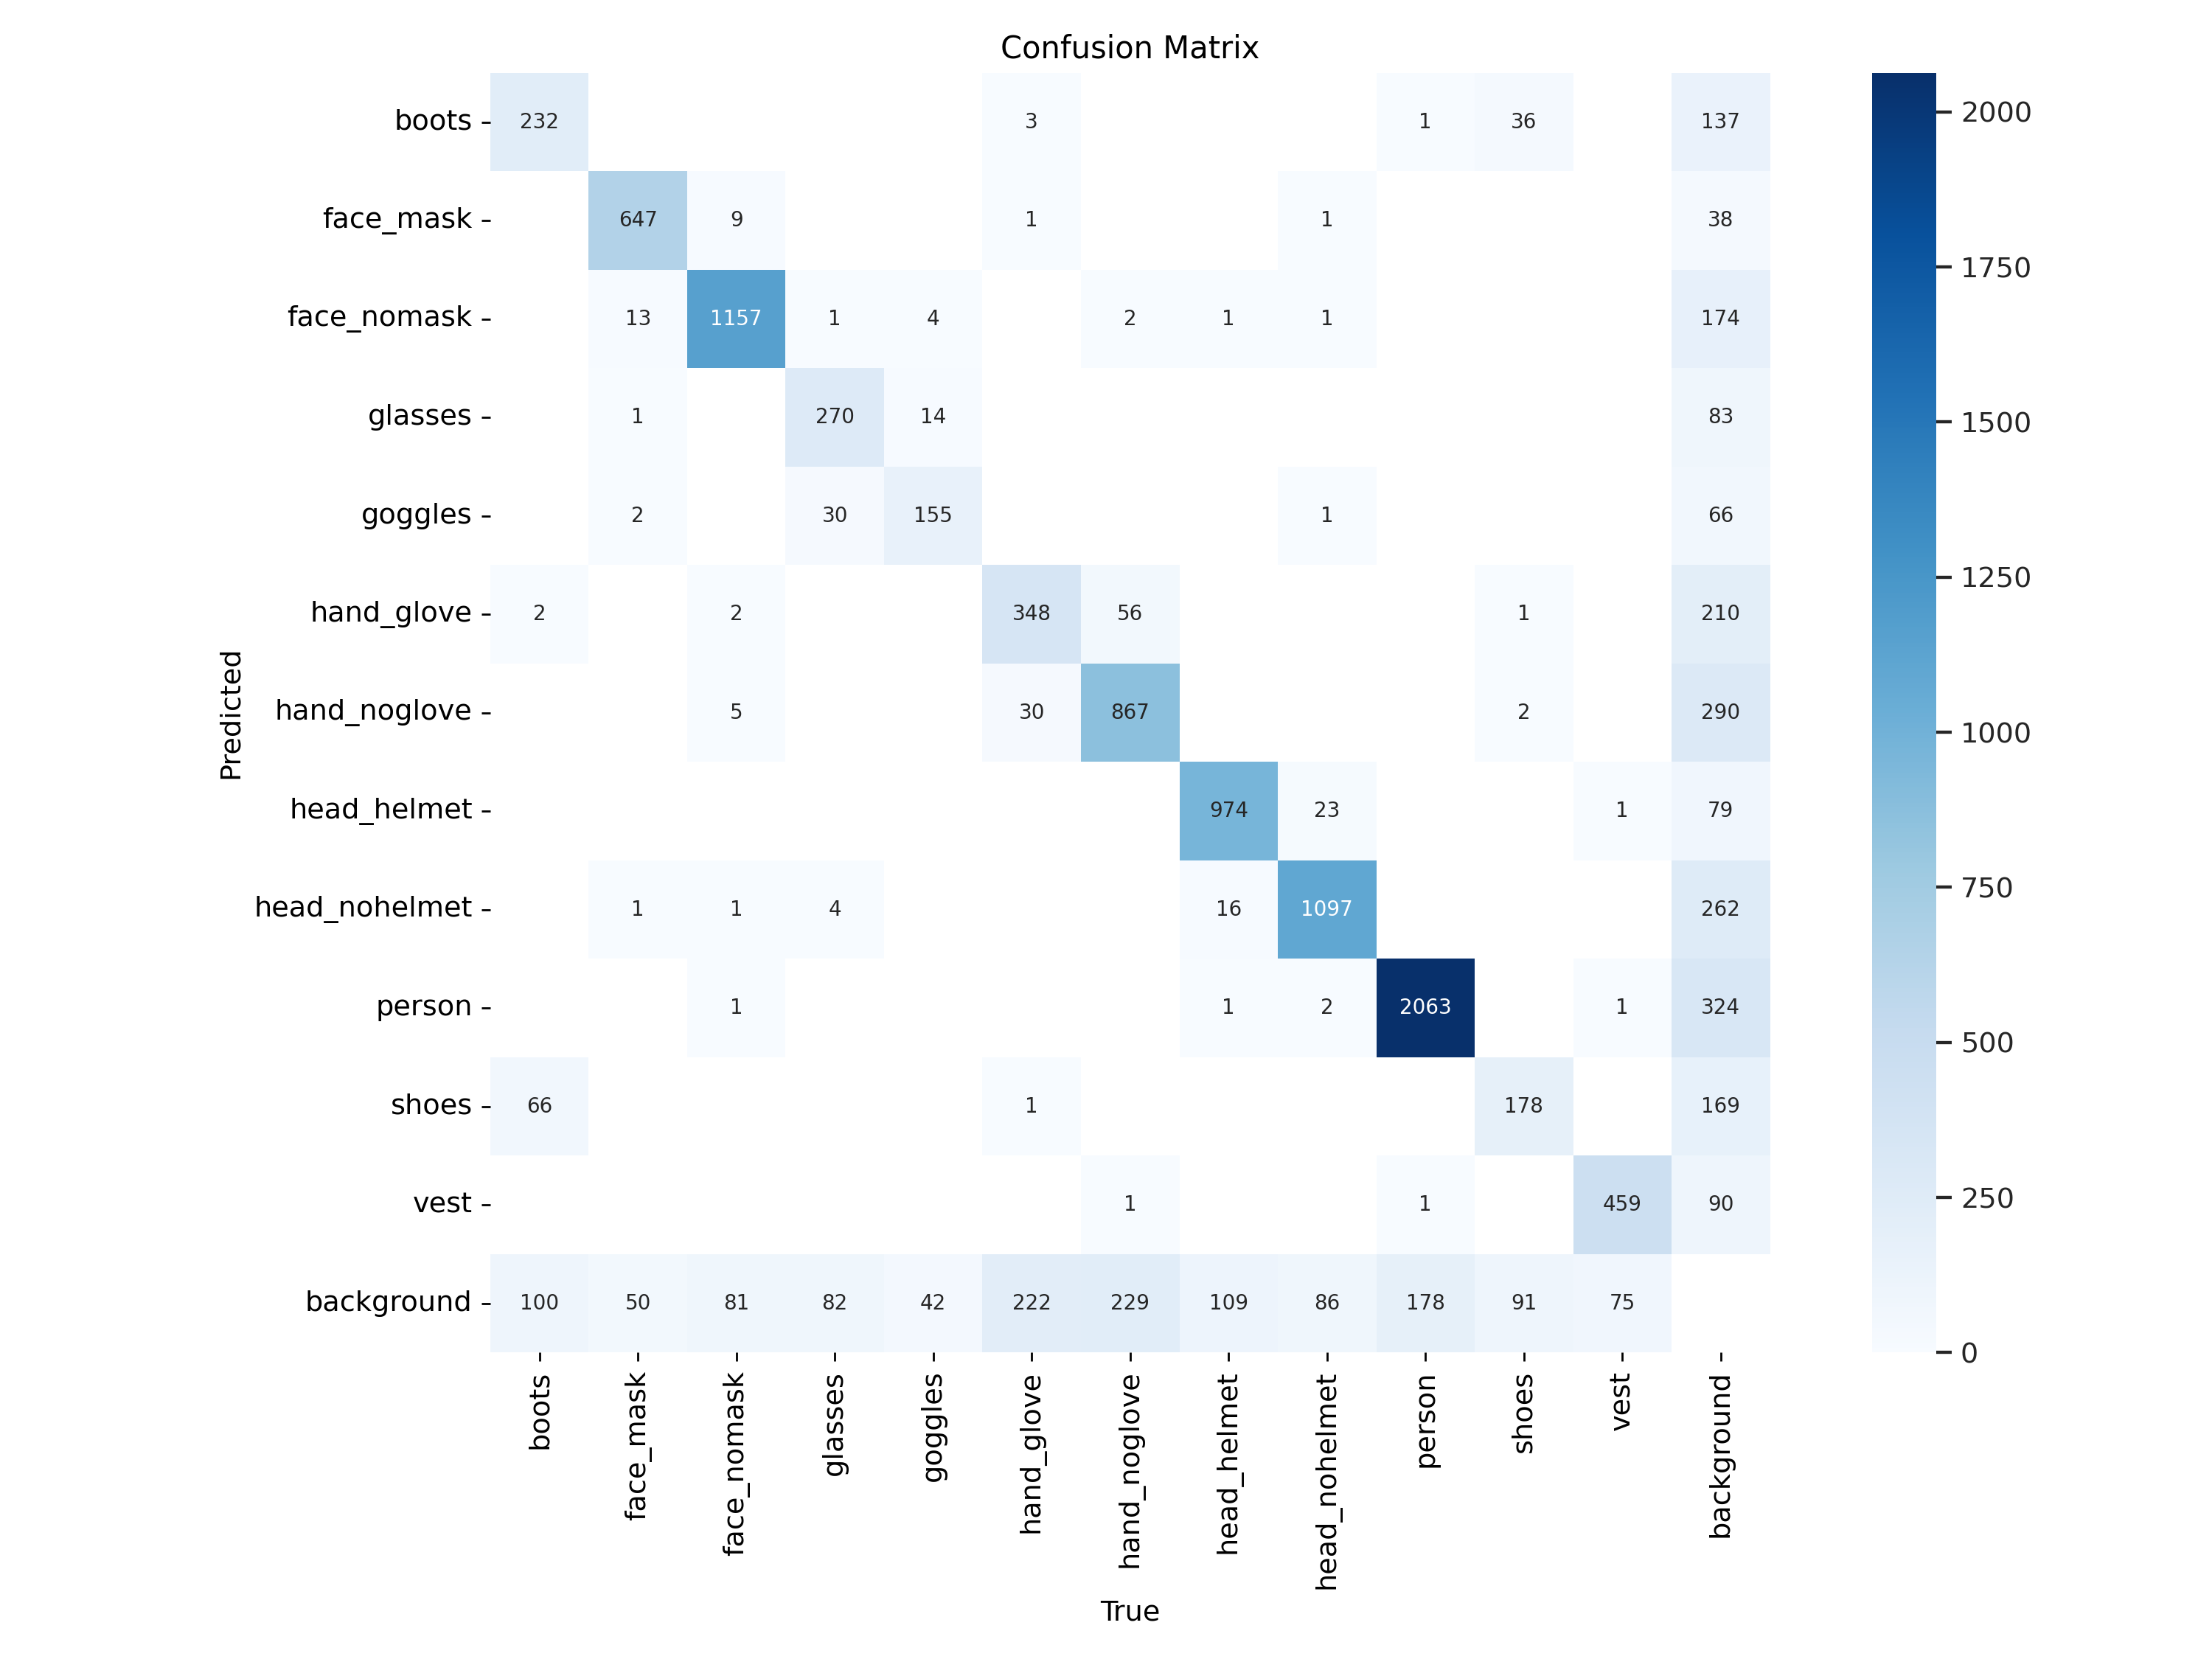

In [22]:
Image(filename=f'runs/detect/val/confusion_matrix.png', width=1000)

In [ ]:
# !yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [24]:
# import glob
# from IPython.display import Image, display

# for image_path in glob.glob(f'runs/detect/predict/*.jpg')[5:15]:
#       display(Image(filename=image_path, width=600))
#       print("\n")